In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from database.TradeHistory import get_session, History
from database.db_utils import get_recent_hist_n_df, get_recent_hist_df
import datetime
import pandas as pd

In [371]:
session = get_session()
df = pd.read_sql_query('select * from history1min', session.bind)
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')
df = df.loc['2018-01-17':]
df

,price,size
exec_date,,
2018-01-17 00:00:00,1.304634e+06,44.072046
2018-01-17 00:01:00,1.302324e+06,43.090379
2018-01-17 00:02:00,1.301190e+06,43.583418
2018-01-17 00:03:00,1.306610e+06,52.189942
2018-01-17 00:04:00,1.316678e+06,42.272148
2018-01-17 00:05:00,1.329728e+06,45.394388
2018-01-17 00:06:00,1.343239e+06,47.468338
2018-01-17 00:07:00,1.335117e+06,40.410436
2018-01-17 00:08:00,1.337435e+06,32.623116


In [372]:
df_detail = get_recent_hist_df(past_time, session)
df_detail

NameError: name 'past_time' is not defined

In [231]:
df_detail.exec_date = pd.to_datetime(df_detail.exec_date)
df_detail = df_detail.set_index('exec_date')

In [4]:
df.size

18422

In [5]:
def zs(p, n, shift=0):
    return (p.shift(shift) - p.rolling(n).mean()) / p.rolling(n).std()


def avg(p, n):
    return p.rolling(n).mean()


def std(p, n):
    return p.rolling(n).std()

In [373]:
bench_price = df.price
bench_size = df['size']
dfb = pd.DataFrame([bench_price, bench_size]).T

p = dfb.price
v = dfb['size']

base = 96

dfb['pma12'] = zs(p / avg(p, 12) - 1, base)
dfb['pma96'] = zs(p / avg(p, 96) - 1, base)
dfb['pma672'] = zs(p / avg(p, 672) - 1, base)
dfb['pma1440'] = zs(p / avg(p, 1440) - 1, base)

dfb['ma4_36'] = zs(avg(p, 4) / avg(p, 36) - 1, base)
dfb['ma12_96'] = zs(avg(p, 12) / avg(p, 96) - 1, base)
dfb['ma60_600'] = zs(avg(p, 60) / avg(p, 600) - 1, base)
dfb['ac12_12'] = zs((p / avg(p, 12)) / avg(p / avg(p, 12), 12), base)
dfb['ac96_96'] = zs((p / avg(p, 96)) / avg(p / avg(p, 96), 12), base)
dfb['ac600_600'] = zs((p / avg(p, 600)) / avg(p / avg(p, 600), 12), base)

dfb['vma12'] = zs(v / avg(v, 12) - 1, base)
dfb['vma96'] = zs(v / avg(v, 96) - 1, base)
dfb['vma672'] = zs(v / avg(v, 672) - 1, base)
dfb['vma1440'] = zs(v / avg(v, 1440) - 1, base)

dfb['vZ12'] = zs(v, 12)
dfb['vZ96'] = zs(v, 96)
dfb['vZ672'] = zs(v, 672)
dfb['vZ1440'] = zs(v, 1440)

dfb['pZ12'] = zs(p, 12)
dfb['pZ96'] = zs(p, 96)
dfb['pZ600'] = zs(p, 600)
dfb['pZ1440'] = zs(p, 1440)
dfb['vol12'] = zs(std(p, 12), base)
dfb['vol96'] = zs(std(p, 96), base)
dfb['vol672'] = zs(std(p, 672), base)
dfb['vol1440'] = zs(std(p, 1440), base)
dfb['dv12_96'] = zs(std(p, 12) / avg(std(p, 12), 96), base)
dfb['dv96_672'] = zs(std(p, 96) / avg(std(p, 96), 672), base)
dfb['dv600_1440'] = zs(std(p, 600) / avg(std(p, 600), 1440), base)

for i in range(600):
    dfb['pZ96_s%02d' % i] = zs(p, 96, shift=i)

for i in range(600):
    dfb['pre_diff%02d' % i] = p.shift(i) / p.shift(i + 1) - 1

dfb['max_diff12'] = p / p.rolling(12).max() - 1
dfb['max_diff96'] = p / p.rolling(96).max() - 1
dfb['max_diff672'] = p / p.rolling(672).max() - 1
dfb['max_diff1440'] = p / p.rolling(1440).max() - 1

dfb['min_diff12'] = p / p.rolling(12).min() - 1
dfb['min_diff96'] = p / p.rolling(96).min() - 1
dfb['min_diff672'] = p / p.rolling(672).min() - 1
dfb['min_diff1440'] = p / p.rolling(1440).min() - 1

dfb['utctime'] = (dfb.index.hour * 60 + dfb.index.minute) / 1440

dfz = dfb

indicator = dfz.reset_index().loc[:, 'pma12':'utctime']
price_history = dfz.reset_index().price

indicator['vma12'] = indicator.vma12.fillna(0)
indicator['vZ12'] = indicator.vZ12.fillna(0)

In [374]:
indicator.shape

(13090, 1238)

In [375]:
indexer.value_counts()

True     9423
False    2133
dtype: int64

In [376]:
answer = price_history.shift(-2) / price_history - 1
answer = (answer > 0.0005) * 1 - (answer < -0.0005) * 1 + 1

indexer = indicator.dv96_672.notnull()
for label in indicator.columns:
    indexer = indexer & indicator[label].notnull()

In [377]:
import numpy as np
d_exp = indicator.loc[indexer]
d_obj = answer[indexer]
data = np.array(d_exp, dtype=np.float32)
t_data = np.array(d_obj, dtype=np.int32)

In [9]:
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList, cuda
import chainer.functions as F
import chainer.links as L

In [111]:
row, col = d_exp.shape

ls_1 = 800
ls_2 = 2000
ls_3 = 2000
ls_4 = 600
out_size = 3
class MyChain(Chain):
    def __init__(self):
        super().__init__(
            l1=L.Linear(col, ls_1),
            l2=L.Linear(ls_1, ls_2),
            l3=L.Linear(ls_2, ls_3),
            l4=L.Linear(ls_3, ls_4),
            l5=L.Linear(ls_4, out_size)
        )
    
    def __call__(self, x):
        h = F.sigmoid(self.l1(x))
        h = F.sigmoid(self.l2(h))
        h = F.leaky_relu(self.l3(h))
        h = F.sigmoid(self.l4(h))
        o = self.l5(h)
        return o

In [391]:
model = MyChain()
# serializers.load_npz('result/min1a2_8_20_20_6_d5/optimizer_snapshot_997', model)
serializers.load_npz('agent/predictor_next.npz', model)
# model.to_cpu()

In [392]:
res = model(data).data
res

array([[ 0.3119809 , -0.60297555,  0.05057026],
       [ 0.23153484, -0.54907036,  0.1438273 ],
       [ 0.31176263, -0.58093184,  0.01814494],
       ..., 
       [-0.19365233, -0.04014971,  0.09332917],
       [-0.21618752,  0.08507074, -0.00453489],
       [-0.41814756, -0.07659271,  0.43246633]], dtype=float32)

In [393]:
result = d_obj.reset_index()
result['predict'] = res.argmax(axis=1)
result

,index,price,predict
0,2133,2,0
1,2134,2,0
2,2135,2,0
3,2136,2,2
4,2137,0,2
5,2138,0,0
6,2139,2,0
7,2140,0,0
8,2141,0,0
9,2142,0,0


In [394]:
test = result.loc[:]
test[test.price == test.predict].shape

(4500, 3)

In [395]:
result.groupby(['price', 'predict']).size()

price  predict
0      0          2256
       1           788
       2          1110
1      0          1173
       1           681
       2           702
2      0          1864
       1           820
       2          1563
dtype: int64

In [396]:
price_test = price_history[indexer]

In [397]:
price_test

2133     1.311090e+06
2134     1.313304e+06
2135     1.313071e+06
2136     1.316061e+06
2137     1.320876e+06
2138     1.318280e+06
2139     1.313672e+06
2140     1.317147e+06
2141     1.316136e+06
2142     1.315158e+06
2143     1.314042e+06
2144     1.314135e+06
2145     1.315141e+06
2146     1.314319e+06
2147     1.313943e+06
2148     1.313324e+06
2149     1.314368e+06
2150     1.316499e+06
2151     1.316426e+06
2152     1.316178e+06
2153     1.315172e+06
2154     1.312931e+06
2155     1.309623e+06
2156     1.311214e+06
2157     1.310093e+06
2158     1.312517e+06
2159     1.315378e+06
2160     1.314280e+06
2161     1.316174e+06
2162     1.318813e+06
             ...     
13060    1.269708e+06
13061    1.270113e+06
13062    1.270236e+06
13063    1.270370e+06
13064    1.270631e+06
13065    1.271243e+06
13066    1.270325e+06
13067    1.269764e+06
13068    1.269019e+06
13069    1.269659e+06
13070    1.269737e+06
13071    1.271003e+06
13072    1.270939e+06
13073    1.271713e+06
13074    1

In [400]:
from matplotlib import pyplot as plt
%matplotlib inline

jpy = 40000
btc = 0
com = 0.03 / 100
x = []
y_p = []
y_jpy = []
sz_all = price_test.size
begin = 0
count = 0
for i, (prc, pred) in enumerate(zip(price_test[begin:], result.predict[begin:])):
    if pred == 2 and jpy > 0:
        btc += jpy / (prc * (1 + com))
        jpy = 0
        count += 1
    elif pred == 0 and btc > 0:
        jpy += btc * (prc * (1 - com))
        btc = 0
        count += 1
    x.append(i)
    y_p.append(prc)
    y_jpy.append(jpy + btc * prc)
jpy + btc * prc, count

(65732.622445564179, 2325)

In [403]:
import random

jpy = 40000
btc = 0
com = 0#0.15 / 100
x = []
y_p = []
y_jpy = []

x_2 = []
y_2 = []
sz_all = price_test.size
begin = 0
for i, (prc, pred) in enumerate(zip(price_test[begin:], result.predict[begin:])):
    if pred == 2 and jpy > 0:
        btc += jpy / (prc * (1 + com))
        jpy = 0
        x_2.append(i)
        y_2.append(btc)
    elif pred == 0 and btc > 0:
        jpy += btc * (prc * (1 - com))
        btc = 0
    x.append(i)
    y_p.append(prc)
    y_jpy.append(jpy + btc * prc)
jpy + btc * prc

132038.73343339836

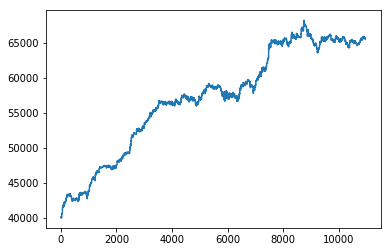

In [401]:
plt.plot(x, y_jpy)

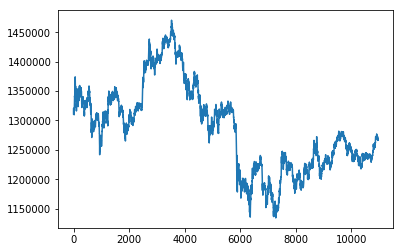

In [402]:
plt.plot(x, y_p)

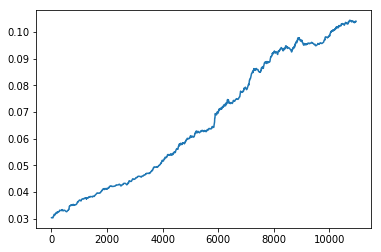

In [404]:
plt.plot(x_2, y_2)

In [67]:
exp_single = [indicator.loc[1000]]
data_single = np.array(exp_single, dtype=np.float32)
data_single

array([[-0.10468615, -0.24378949,  1.17827272,  0.31623939, -0.18529482,
        -0.30773506, -0.22841381, -0.77849382, -0.74054968, -0.65952748,
        -1.2418139 , -0.67521131, -0.88793594,  0.        ,  0.        ,
         0.        ,  0.        ,  0.68722892,  1.45043373, -0.45318955,
         0.09282427,  1.86361432, -0.63901508,  0.07308167,  0.70833331]], dtype=float32)

In [181]:
count

1354